In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import DistanceMetric
from time import perf_counter

In [2]:
def plot_gallery(images):
# Affiche les 12 premières images contenues dans images
# images est de taille Nb image*Ny*Nx
    plt.figure(figsize=(7.2, 7.2))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(12):
        plt.subplot(3, 4, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())
    plt.show()

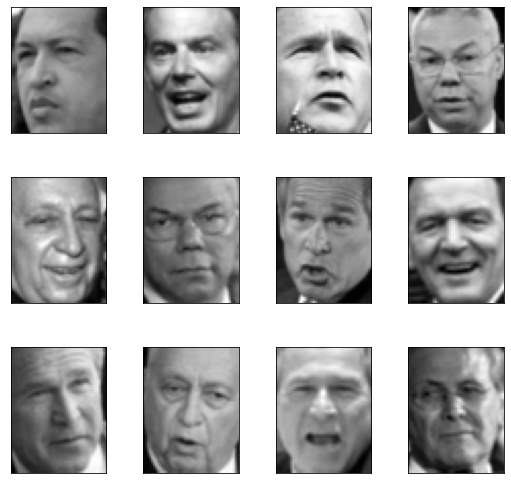

In [3]:
#charger et afficher les données 
[X, y, name]=np.load("./../data_analyse/DATA/TP1.npy",allow_pickle=True )
plot_gallery(X)

In [4]:
print("la taille des images est : ", len(X[0]),'x',len(X[0][0]),"pixels")
print("le nombre  d'images est : ", len(y))
print("le nombre de classes est : ", len(name))

la taille des images est :  62 x 47 pixels
le nombre  d'images est :  1288
le nombre de classes est :  7


In [72]:
l = [ i for i in range(10)]
for i, e in enumerate(l):
    print(i, e)

0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9


In [20]:
name.tolist()

['Ariel Sharon',
 'Colin Powell',
 'Donald Rumsfeld',
 'George W Bush',
 'Gerhard Schroeder',
 'Hugo Chavez',
 'Tony Blair']

(array([ 77., 236., 121., 530., 109.,  71., 144.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <BarContainer object of 7 artists>)

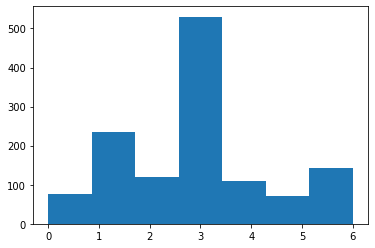

In [53]:
plt.hist(y, bins = len(name))

In [28]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)

In [47]:
print("nombre d'images en train :  {}".format(len(y)))
print("Dimensions de X_train :  {}".format(X_train.shape))
print("Dimensions de X_test :  {}".format(X_test.shape))
print("Dimensions de y_train :  {}".format(len(y_train)))
print("Dimensions de y_test :  {}".format(len(y_test)))

nombre d'images en train :  1288
Dimensions de X_train :  (966, 62, 47)
Dimensions de X_test :  (322, 62, 47)
Dimensions de y_train :  966
Dimensions de y_test :  322


In [65]:
multiply = X_train.shape[1] * X_train.shape[2]
reshape = X_train.reshape(len(X_train),multiply)
multiply_test = X_test.shape[1] * X_test.shape[2]
reshape_test = X_test.reshape(len(X_test),multiply)
reshape.shape


(966, 2914)

In [66]:
reshape_test.shape

(322, 2914)

In [81]:
Scaler=StandardScaler()
Scaler.fit(reshape)
X_train=Scaler.transform(reshape)
X_test=Scaler.transform(reshape_test)


In [83]:
knn = KNeighborsClassifier(n_neighbors=1)
# fit 
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [92]:
accuracy_score(y_test, knn.predict(X_test))

0.577639751552795

In [94]:
confusion_matrix(y_test, knn.predict(X_test))

array([[  5,   1,   0,   4,   2,   1,   0],
       [  2,  31,   4,  12,   4,   3,   4],
       [  3,   5,  15,   4,   0,   0,   0],
       [  2,   5,   9, 102,   6,   7,  15],
       [  1,   2,   3,   5,   9,   1,   4],
       [  0,   1,   0,   4,   2,   8,   0],
       [  1,   3,   2,  10,   2,   2,  16]], dtype=int64)

In [151]:
evolution = []
tps1 = perf_counter()

for i in range(1,5):
    knn = KNeighborsClassifier(n_neighbors=i)
# fit 
    knn.fit(X_train, y_train)
    accuracy_score(y_test, knn.predict(X_test))
    evolution.append([accuracy_score(y_test, knn.predict(X_test))])
tps2 = perf_counter()

print(tps2 - tps1)
evolution

0.5312169000098947


[[0.577639751552795],
 [0.5652173913043478],
 [0.5962732919254659],
 [0.6366459627329193]]

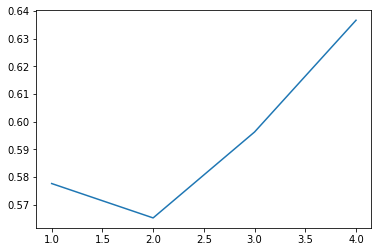

In [120]:
y = [1,2,3,4]
plt.plot(y, evolution)

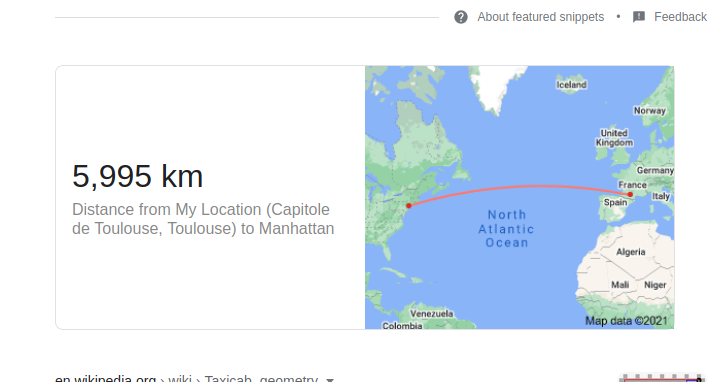

In [134]:
from IPython.display import Image
Image(filename='manhtan_kaboul.png')

In [138]:
dist = DistanceMetric.get_metric('manhattan')

In [149]:
evolution2 = []
tps1 = perf_counter()
for i in range(1,5):
    knn = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
# fit 
    knn.fit(X_train, y_train)
    accuracy_score(y_test, knn.predict(X_test))
    evolution2.append([accuracy_score(y_test, knn.predict(X_test))])
tps2 = perf_counter()
print(tps2 - tps1)
evolution2

10.01403510000091


[[0.5993788819875776],
 [0.593167701863354],
 [0.6490683229813664],
 [0.65527950310559]]

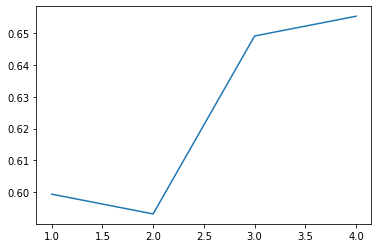

In [150]:
plt.plot(y,evolution2)